In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# data preparation


In [4]:
# pip install keras==2.14.0


1. Install the Kaggle API:
If you haven't installed it yet, run the following command:
'''pip install kaggle'''
2. Set Up Your Kaggle API Key:
Go to your Kaggle account: Kaggle Account.
Scroll down to the API section and click Create New API Token.
This will download a kaggle.json file containing your API credentials.
Place the kaggle.json file in your .kaggle folder:
- On Windows: C:\Users\<YourUsername>\.kaggle\kaggle.json
- On Mac/Linux: /Users/<YourUsername>/.kaggle/kaggle.json

In [7]:
# import os
# import zipfile
# import subprocess
# # Define paths for Kaggle datasets
# datasets = {
#     "ravdess": "uwrfkaggler/ravdess-emotional-speech-audio",
#     "crema_d": "ejlok1/cremad",
#     "tess": "ejlok1/toronto-emotional-speech-set-tess",
#     "savee": "ejlok1/surrey-audiovisual-expressed-emotion-savee"
# }

# # Set the directory where you want to download datasets
# download_dir = "datasets"

# # Create the directory if it does not exist
# os.makedirs(download_dir, exist_ok=True)

# # Download all datasets
# for dataset_name, dataset_path in datasets.items():
#     print(f"Downloading {dataset_name}...")
#     subprocess.run(["kaggle", "datasets", "download", "-d", dataset_path, "-p", download_dir])
#     print(f"{dataset_name} downloaded!")

# # Unzipping downloaded files using zipfile module
# print("Unzipping downloaded files...")
# for file in os.listdir(download_dir):
#     if file.endswith(".zip"):
#         file_path = os.path.join(download_dir, file)
#         print(f"Unzipping {file_path}...")
#         with zipfile.ZipFile(file_path, 'r') as zip_ref:
#             zip_ref.extractall(download_dir)
#         print(f"Unzipped {file_path}")

# print("All datasets downloaded and unzipped successfully!")



# 1. Ravdess Dataframe

In [10]:
import os
import pandas as pd

# Define the path to the RAVDESS dataset
Ravdess = 'datasets/audio_speech_actors_01-24'  

# List all directories in the RAVDESS dataset
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

# Iterate through each actor's directory
for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))  # Get all files in the actor's directory
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # The third part of the filename represents the emotion
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))

# Create a dataframe for the emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Replace emotion integers with actual emotion labels
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)

# Display the first few rows of the dataframe
Ravdess_df.head(7)


,Emotions,Path
0,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
1,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
2,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
3,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
4,calm,datasets/audio_speech_actors_01-24\Actor_01\03...
5,calm,datasets/audio_speech_actors_01-24\Actor_01\03...
6,calm,datasets/audio_speech_actors_01-24\Actor_01\03...


# 2. Crema DataFrame

In [13]:
import os
import pandas as pd

# Define the path to the CREMA dataset
Crema = 'datasets/AudioWAV'  

# List all files in the CREMA dataset directory
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

# Process each file in the CREMA directory
for file in crema_directory_list:
    # Store file paths
    file_path.append(os.path.join(Crema, file))
    
    # Extract and store file emotions based on the filename
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# Create dataframes for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the two dataframes
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the dataframe
Crema_df.head(7)


,Emotions,Path
0,angry,datasets/AudioWAV\1001_DFA_ANG_XX.wav
1,disgust,datasets/AudioWAV\1001_DFA_DIS_XX.wav
2,fear,datasets/AudioWAV\1001_DFA_FEA_XX.wav
3,happy,datasets/AudioWAV\1001_DFA_HAP_XX.wav
4,neutral,datasets/AudioWAV\1001_DFA_NEU_XX.wav
5,sad,datasets/AudioWAV\1001_DFA_SAD_XX.wav
6,angry,datasets/AudioWAV\1001_IEO_ANG_HI.wav


# 3. TESS dataset

In [16]:
import os
import pandas as pd

# Define the path to the TESS dataset
Tess = 'datasets/TESS'  

# List all directories (each emotion) in the TESS dataset
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

# Process each directory (emotion category) in the TESS dataset
for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))  # List files in each emotion folder
    for file in directories:
        part = file.split('.')[0]
        parts = part.split('_')
        
        # Ensure that the file has enough parts after splitting
        if len(parts) >= 3:
            emotion = parts[2]
            
            # Handle 'ps' as 'surprise', otherwise take the emotion directly from the filename
            if emotion == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(emotion)
        
            # Append the full file path
            file_path.append(os.path.join(Tess, dir, file))
        else:
            print(f"Skipping file {file} as it doesn't have enough parts.")

# Create dataframes for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the two dataframes
Tess_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the dataframe
Tess_df.head(7)



,Emotions,Path
0,angry,datasets/TESS\OAF_angry\OAF_back_angry.wav
1,angry,datasets/TESS\OAF_angry\OAF_bar_angry.wav
2,angry,datasets/TESS\OAF_angry\OAF_base_angry.wav
3,angry,datasets/TESS\OAF_angry\OAF_bath_angry.wav
4,angry,datasets/TESS\OAF_angry\OAF_bean_angry.wav
5,angry,datasets/TESS\OAF_angry\OAF_beg_angry.wav
6,angry,datasets/TESS\OAF_angry\OAF_bite_angry.wav


# 4. CREMA-D dataset(SAVEE) 
### The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise'

In [19]:
import os
import pandas as pd

# Define the path to the SAVEE dataset
Savee = 'datasets/ALL'  

# List all files in the SAVEE dataset directory
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

# Process each file in the SAVEE dataset
for file in savee_directory_list:
    # Append the full file path
    file_path.append(os.path.join(Savee, file))
    
    # Extract emotion from the file name
    part = file.split('_')[1]  # Assuming the emotion is in the second part
    ele = part[:-6]  # Extract the emotion identifier
    
    # Map emotion identifier to actual emotion
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# Create dataframes for emotions and file paths
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenate the two dataframes
Savee_df = pd.concat([emotion_df, path_df], axis=1)

# Display the first few rows of the dataframe
Savee_df.head(7)


,Emotions,Path
0,angry,datasets/ALL\DC_a01.wav
1,angry,datasets/ALL\DC_a02.wav
2,angry,datasets/ALL\DC_a03.wav
3,angry,datasets/ALL\DC_a04.wav
4,angry,datasets/ALL\DC_a05.wav
5,angry,datasets/ALL\DC_a06.wav
6,angry,datasets/ALL\DC_a07.wav


In [21]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
1,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
2,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
3,neutral,datasets/audio_speech_actors_01-24\Actor_01\03...
4,calm,datasets/audio_speech_actors_01-24\Actor_01\03...


# Data Visualisation and Exploration

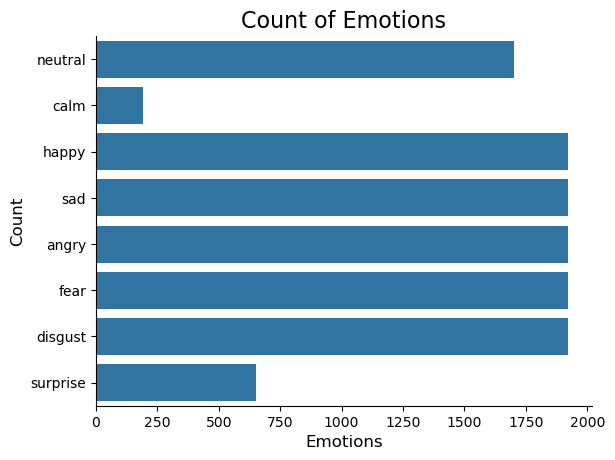

In [24]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
# Corrected 'buttom' to 'bottom'
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

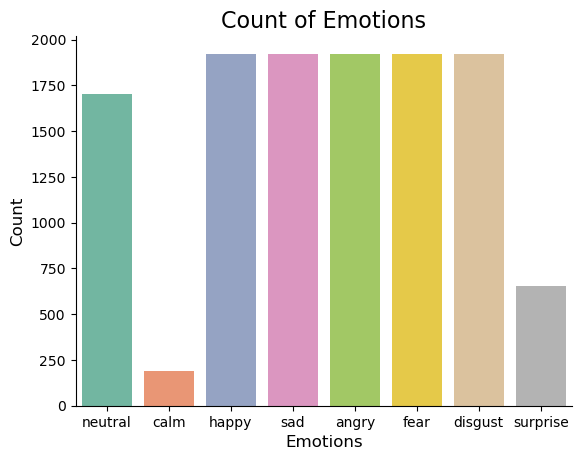

In [26]:
# Filter out rows where 'Emotions' is 'surprised'
filtered_data = data_path[data_path.Emotions != 'surprised']

# Plot the filtered data
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=filtered_data, palette="Set2")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


We can also plot waveplots and spectograms for audio signals

- Waveplots - Waveplots let us know the loudness of the audio at a given time.
- Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. 
  It’s a representation of frequencies changing with respect to time for given audio/music signals.

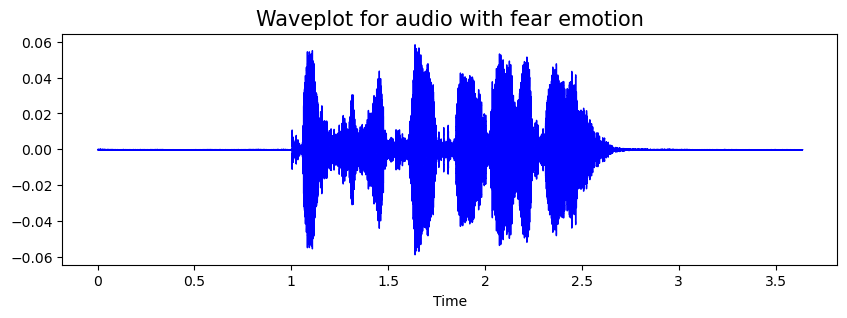

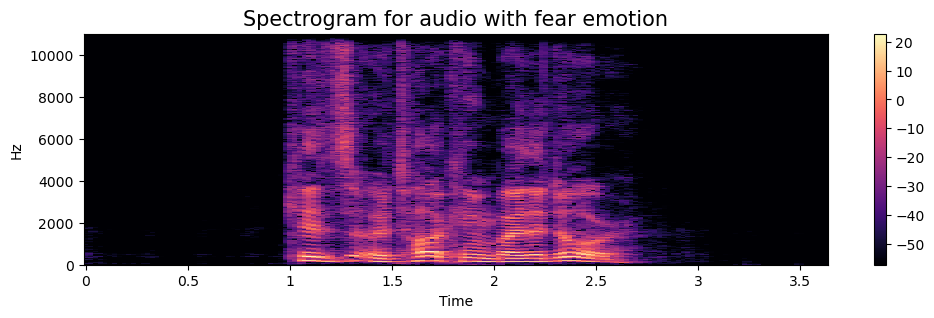

In [29]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr, color='b')  # Use waveshow instead of waveplot
    plt.show()

def create_spectrogram(data, sr, e):
    # STFT function converts the data into short term Fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram for audio with {e} emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()

# Example usage
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


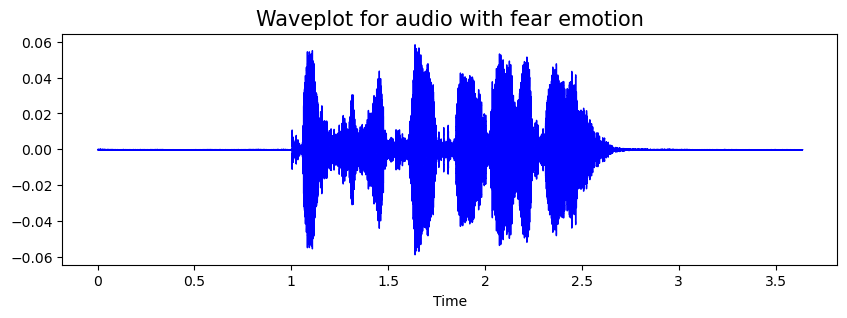

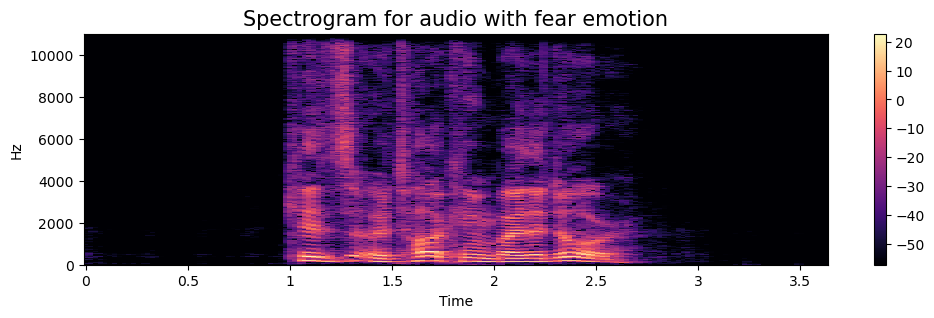

In [31]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

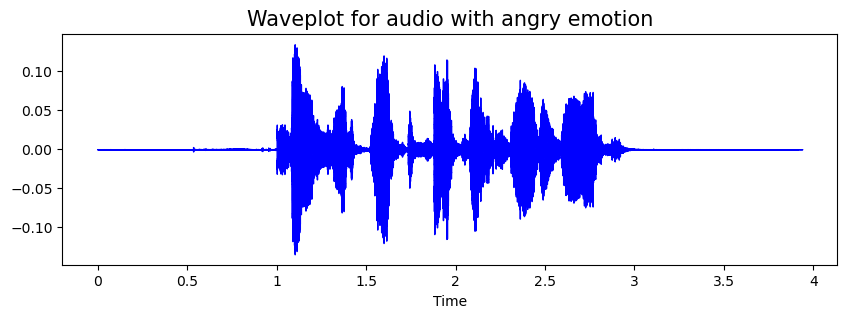

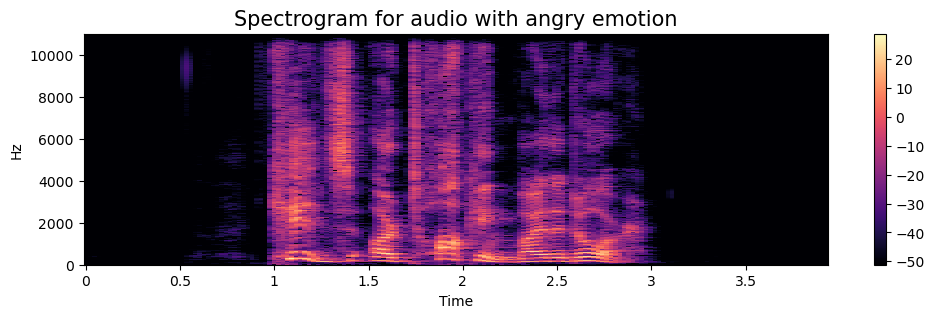

In [33]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Data Augmentation
- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
- To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
* The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
- In order to this to work adding the perturbations must conserve the same label as the original training sample.
* In images data augmention can be performed by shifting the image, zooming, rotating ...
- First, let's check which augmentation techniques works better for our dataset.

In [36]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

# 1. Simple Audio

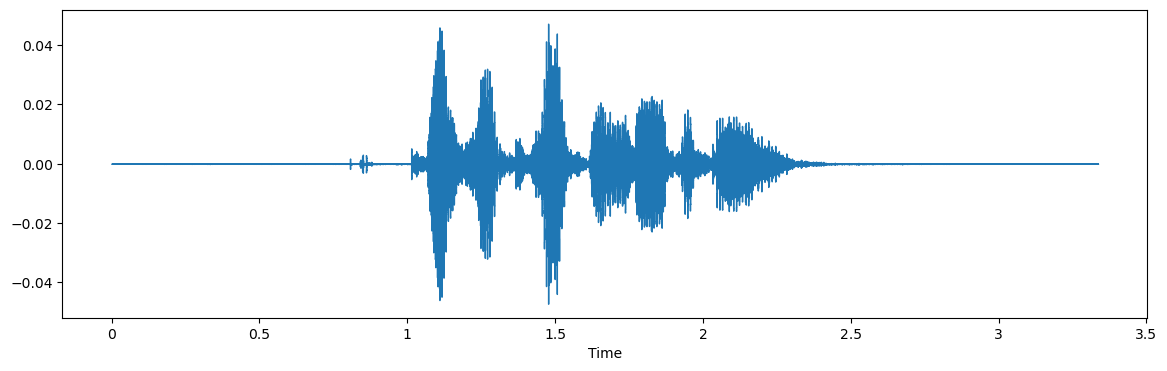

In [39]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)


## Noise injection

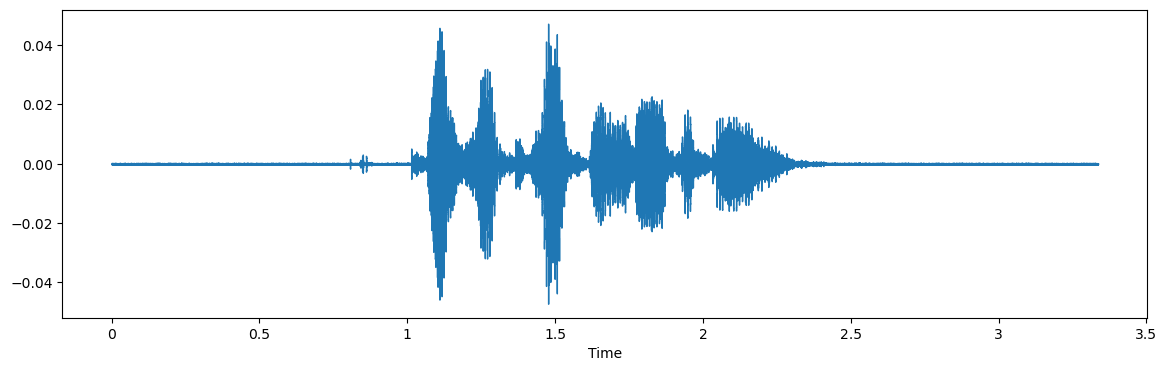

In [42]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)


### We can see noise injection is a very good augmentation technique because of which we can assure our training model is not overfitted

# Stretching

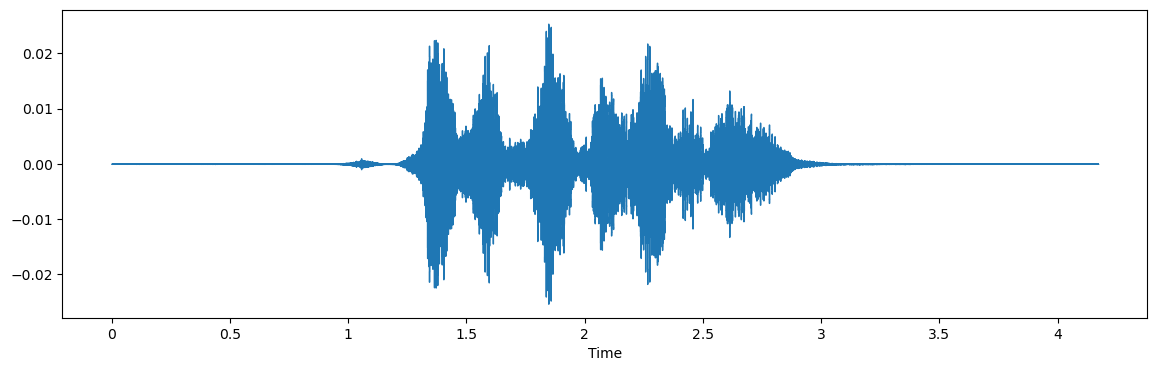

In [46]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load audio data with librosa
data, sample_rate = librosa.load(path)  # Make sure to load with librosa.load()

# Define the stretch function correctly
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

# Apply stretching
x = stretch(data)

# Plot the stretched waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.show()

# Play the stretched audio
Audio(x, rate=sample_rate)


# Shifting

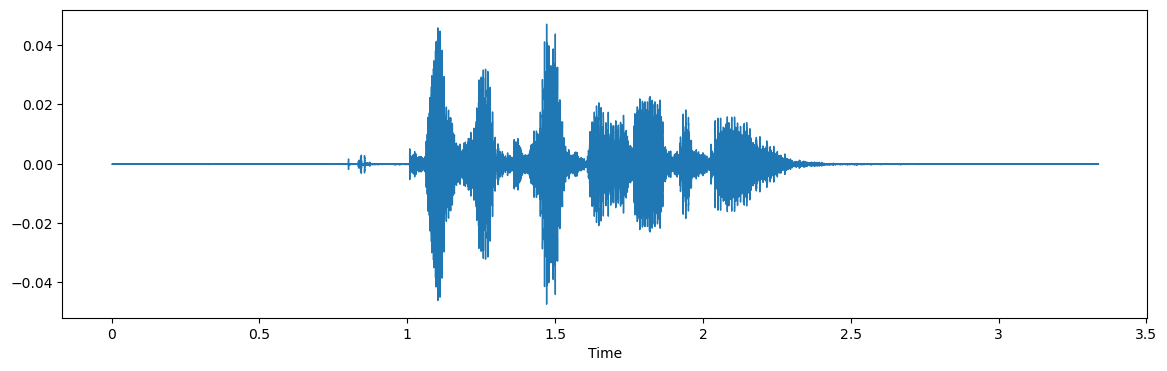

In [49]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Pitch

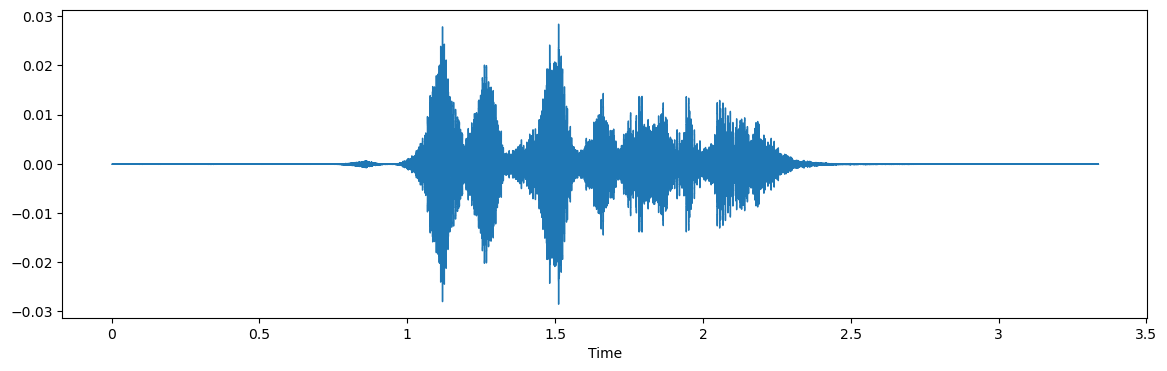

In [52]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Define the pitch shifting function
def pitch(data, sampling_rate, n_steps=2):
    # n_steps is the number of half-steps to shift the pitch up or down
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=n_steps)

# Call the pitch function with both the data and sampling_rate arguments
x = pitch(data, sample_rate)

# Plot the pitch-shifted waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.show()

# Play the pitch-shifted audio
Audio(x, rate=sample_rate)


#  From the above types of augmentation techniques i am using noise, stretching(ie. changing speed) and some pitching.

## Feature Extraction¶
### Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.
-  The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

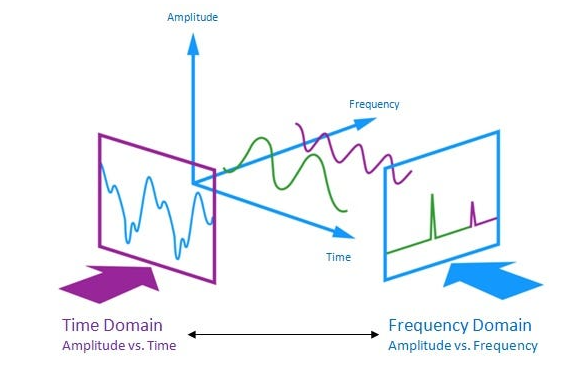

I am no expert on audio signals and feature extraction on audio files so i need to search and found a very good blog written by Askash Mallik on feature extraction.

As stated there with the help of the sample rate and the sample data, one can perform several transformations on it to extract valuable features out of it.

- Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
- Energy : The sum of squares of the signal values, normalized by the respective frame length.
- Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
- Spectral Centroid : The center of gravity of the spectrum.
- Spectral Spread : The second central moment of the spectrum.Spectral Spread : The second central moment of the spectrum.
- Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.
- Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
- Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
- MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
- Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
- Chroma Deviation : The standard deviation of the 12 chroma coefficients.
- In this project i am not going deep in feature selection process to check which features are good for our dataset rather i am only extracting 5 features:

- Zero Crossing Rate
* Chroma_stft
- MFCC
- RMS(root mean square) value
* MelSpectogram to train our model.

In [56]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [58]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [40]:
len(X),  len(Y), data_path.Path, data_path.shape

(36486,
 36486,
 0      datasets/audio_speech_actors_01-24\Actor_01\03...
 1      datasets/audio_speech_actors_01-24\Actor_01\03...
 2      datasets/audio_speech_actors_01-24\Actor_01\03...
 3      datasets/audio_speech_actors_01-24\Actor_01\03...
 4      datasets/audio_speech_actors_01-24\Actor_01\03...
                              ...                        
 475                             datasets/ALL\KL_su11.wav
 476                             datasets/ALL\KL_su12.wav
 477                             datasets/ALL\KL_su13.wav
 478                             datasets/ALL\KL_su14.wav
 479                             datasets/ALL\KL_su15.wav
 Name: Path, Length: 12162, dtype: object,
 (12162, 2))

In [65]:
Features = pd.DataFrame(X)
Features['labels'] = Y 
Features.to_csv('features.csv', index = False)
Features.head(7)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,4.310903e-06,3.291511e-06,2.148075e-06,2.279739e-06,0.000005,8.190282e-06,7.024454e-06,5.051209e-06,4.245835e-07,neutral
1,0.304267,0.758432,0.813700,0.801191,0.793452,0.806751,0.751676,0.667152,0.711090,0.760905,...,2.602953e-05,2.550895e-05,2.340059e-05,2.266238e-05,0.000027,2.912678e-05,2.750547e-05,2.589206e-05,2.258627e-05,neutral
2,0.175354,0.697448,0.648260,0.700969,0.754421,0.685846,0.654034,0.673907,0.660143,0.670817,...,9.860163e-07,5.285361e-07,8.273578e-07,6.292203e-07,0.000001,5.300844e-07,4.321546e-07,1.911200e-07,2.231158e-08,neutral
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984504e-06,7.034949e-06,6.654923e-06,6.979548e-06,0.000012,9.640184e-06,1.096403e-05,5.543237e-06,4.254087e-07,neutral
4,0.250059,0.719998,0.752731,0.723889,0.710824,0.729451,0.675386,0.652064,0.696359,0.725411,...,7.134074e-06,7.125169e-06,6.652138e-06,7.071601e-06,0.000012,9.766524e-06,1.112323e-05,5.736389e-06,5.724606e-07,neutral
5,0.177232,0.701037,0.676973,0.639318,0.694866,0.681838,0.575509,0.590863,0.646742,0.592447,...,8.078038e-07,9.032605e-07,1.005556e-06,1.024751e-06,0.000001,1.186613e-06,1.389304e-06,8.389625e-07,5.675469e-08,neutral
6,0.337678,0.715208,0.759374,0.755703,0.757634,0.743580,0.651788,0.629598,0.679255,0.737464,...,1.279415e-05,1.287855e-05,1.521516e-05,1.980499e-05,0.000028,4.845906e-05,3.165384e-05,1.754835e-05,1.461863e-06,neutral


## We have applied data augmentation and extracted the features for each audio files and saved them.

# Data Preparation

## As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [66]:
X = Features.iloc[: , :-1].values
Y = Features['labels'].values

In [68]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

In [72]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((27364, 162), (9122, 162), (27364, 8), (9122, 8))

In [74]:
# splatting our data with sklearn's std scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [76]:
# making our data compatible to model
x_train = np.expand_dims(x_train, axis=2)
x_test =np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

# Modelling

In [257]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UpgradedCNNModel(nn.Module):
    def __init__(self):
        super(UpgradedCNNModel, self).__init__()
        
        # First convolutional layer with dropout for regularization
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)  # Pooling layer with smaller kernel

        # Second convolutional layer
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        
        # Third convolutional layer with dropout
        self.conv3 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.3)  # Increase dropout rate for stronger regularization
        
        # Fourth convolutional layer
        self.conv4 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm1d(128)
        
        # Fifth convolutional layer with dropout
        self.conv5 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        # Sixth convolutional layer
        self.conv6 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm1d(32)
        
        # Global average pooling layer to reduce dimensions
        self.global_pool = nn.AdaptiveAvgPool1d(1)

        # Fully connected layers with dropout
        self.fc1 = nn.Linear(32, 32)
        self.dropout3 = nn.Dropout(0.5)  # Higher dropout rate for final layers
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)  # Output layer with 8 classes

    def forward(self, x):
        # Convolutional and pooling layers with batch normalization
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout1(x)
        
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        x = self.dropout2(x)
        
        x = self.pool(F.relu(self.bn6(self.conv6(x))))
        
        # Global average pooling
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)  # Flatten for fully connected layers
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout3(x)
        
        x = F.relu(self.fc2(x))
        
        # Output layer with log_softmax activation for multi-class classification
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = UpgradedCNNModel()
print(model)




UpgradedCNNModel(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv4): Conv1d(256, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
 

In [259]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn

# Assume x_train and y_train are numpy arrays
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)  # Convert x_train to float tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.long)     # Convert y_train to long tensor for classification

# Create Dataset and DataLoader for training
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# If you have validation data (x_test, y_test), create val_loader as well
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)    # Convert x_test to float tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.long)       # Convert y_test to long tensor
val_dataset = TensorDataset(x_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



In [261]:
# Step 2: Define Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = UpgradedCNNModel().to(device)  # Assuming CNNModel is your model class


cuda


In [263]:
# Step 3: Set Up Training Components
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.4, patience=2, verbose=True, min_lr=1e-7)


In [271]:
# Lists to store the training and validation metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training phase
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Convert one-hot encoded labels to class indices if necessary
        if labels.dim() > 1 and labels.size(1) > 1:
            labels = torch.argmax(labels, dim=1)

        # Transpose inputs to (batch_size, channels, sequence_length)
        inputs = inputs.permute(0, 2, 1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Convert one-hot encoded labels to class indices if necessary
            if labels.dim() > 1 and labels.size(1) > 1:
                labels = torch.argmax(labels, dim=1)

            inputs = inputs.permute(0, 2, 1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Adjust the learning rate based on validation loss
    scheduler.step(val_loss)

    # Print epoch statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")


Epoch [1/50], Training Loss: 0.8486, Training Accuracy: 0.6769, Validation Loss: 1.0795, Validation Accuracy: 0.5939
Epoch [2/50], Training Loss: 0.8451, Training Accuracy: 0.6799, Validation Loss: 1.1146, Validation Accuracy: 0.5998
Epoch [3/50], Training Loss: 0.8464, Training Accuracy: 0.6803, Validation Loss: 1.2443, Validation Accuracy: 0.5586
Epoch [4/50], Training Loss: 0.8552, Training Accuracy: 0.6749, Validation Loss: 1.0837, Validation Accuracy: 0.6016
Epoch [5/50], Training Loss: 0.8464, Training Accuracy: 0.6782, Validation Loss: 1.1256, Validation Accuracy: 0.5891
Epoch [6/50], Training Loss: 0.8478, Training Accuracy: 0.6775, Validation Loss: 1.0910, Validation Accuracy: 0.5982
Epoch [7/50], Training Loss: 0.8447, Training Accuracy: 0.6783, Validation Loss: 1.2058, Validation Accuracy: 0.5745
Epoch [8/50], Training Loss: 0.8450, Training Accuracy: 0.6772, Validation Loss: 1.2375, Validation Accuracy: 0.5640
Epoch [9/50], Training Loss: 0.8469, Training Accuracy: 0.6782, 

# Plotting the Metrics

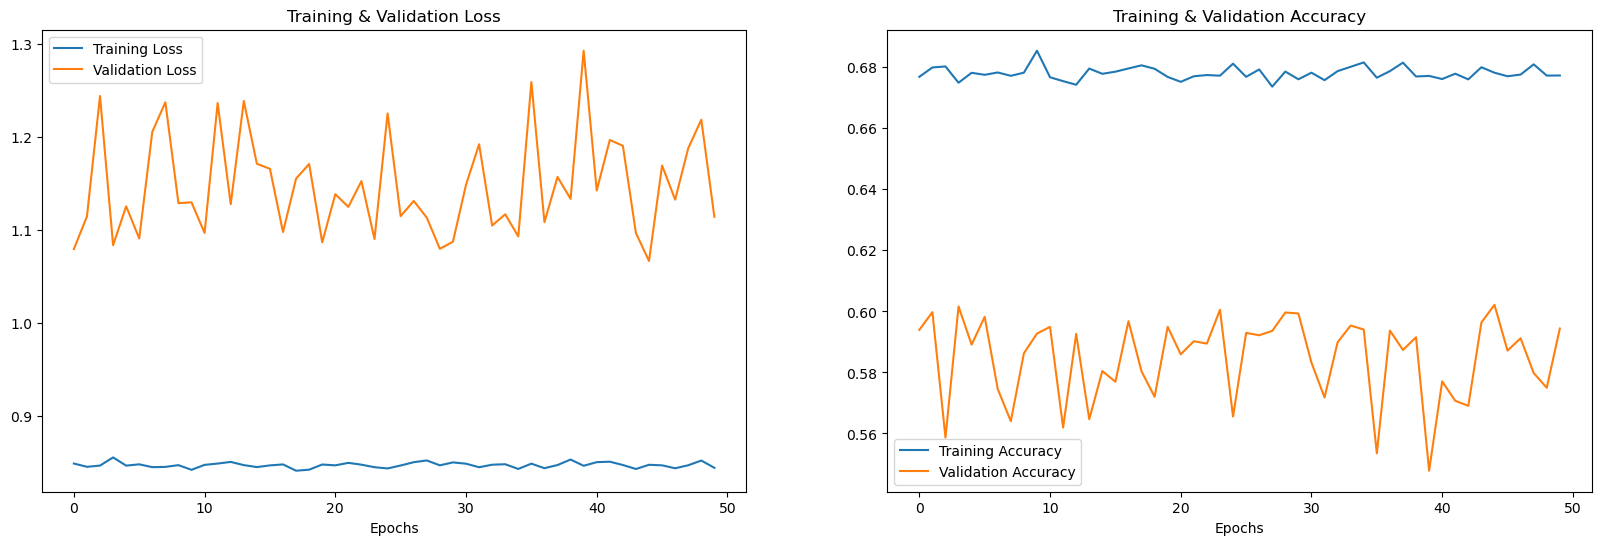

In [280]:
import matplotlib.pyplot as plt

epochs = range(num_epochs)
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot Training and Validation Loss
ax[0].plot(epochs, train_losses, label='Training Loss')
ax[0].plot(epochs, val_losses, label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

# Plot Training and Validation Accuracy
ax[1].plot(epochs, train_accuracies, label='Training Accuracy')
ax[1].plot(epochs, val_accuracies, label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

plt.show()


# Final Model Evaluation on Test Data

In [277]:
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in val_loader:  
        inputs, labels = inputs.to(device), labels.to(device)

        # Convert one-hot encoded labels to class indices if necessary
        if labels.dim() > 1 and labels.size(1) > 1:
            labels = torch.argmax(labels, dim=1)

        inputs = inputs.permute(0, 2, 1)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test += labels.size(0)

test_accuracy = correct_test / total_test
print("Accuracy of our model on test data:", test_accuracy * 100, "%")


Accuracy of our model on test data: 59.43871957903969 %
